# Input data

note: add pip install wordcloud to requirements...

In [30]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [19]:
dummy_data = {'drug' : ['Tylenol', 'Cialis', 'Ibuprofen', 'Benadril', 'Claritin'],
       'headache' : [2, 4, 0, 1, 0],
       'nausea' : [0, 1, 1, 1, 0],
       'dizzy' : [0, 2, 1, 1, 0],
       'death' : [1, 0, 1, 2, 20]}
dummy_df = pd.DataFrame(dummy_data, columns = dummy_data.keys())

dummy_df

,drug,headache,nausea,dizzy,death
0,Tylenol,2,0,0,1
1,Cialis,4,1,2,0
2,Ibuprofen,0,1,1,1
3,Benadril,1,1,1,2
4,Claritin,0,0,0,20


In [18]:
def make_dicks(pandas):
    row = {}
    for column in pandas.columns:
        row[f'{column}'] = pandas.loc[0,f'{column}']
    return row

In [25]:
singlesample = dummy_df.loc[[0]]

In [26]:
dick = make_dicks(singlesample)
dick

{'drug': 'Tylenol', 'headache': 2, 'nausea': 0, 'dizzy': 0, 'death': 1}

# Simple Visualisation

<AxesSubplot:>

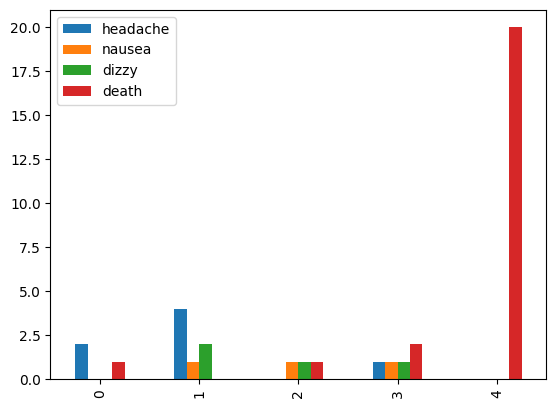

In [22]:
dummy_df.plot(kind='bar')

In [6]:
sideeffect_df = dummy_df.drop(['drug', 'condition'], axis=1)
sideeffect_df.index = dummy_df['drug']
sideeffect_df

,headache,nausea,dizzy,death
drug,,,,
Tylenol,2,0,0,1
Cialis,4,1,2,0
Ibuprofen,0,1,1,1
Benadril,1,1,1,2
Claritin,0,0,0,20


In [7]:
input = 'Tylenol'
sideeffect_df.loc[input]

headache    2
nausea      0
dizzy       0
death       1
Name: Tylenol, dtype: int64

<AxesSubplot:>

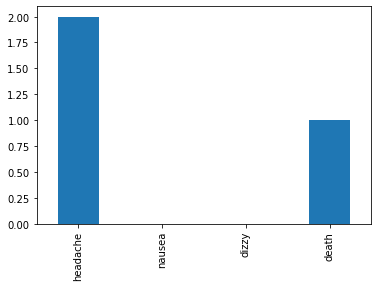

In [8]:
sideeffect_df.loc[input].plot(kind='bar')

In [27]:
group_data = list(dick.values())[1:]
group_names = list(dick.keys())[1:]

print(group_data, group_names)

[2, 0, 0, 1] ['headache', 'nausea', 'dizzy', 'death']


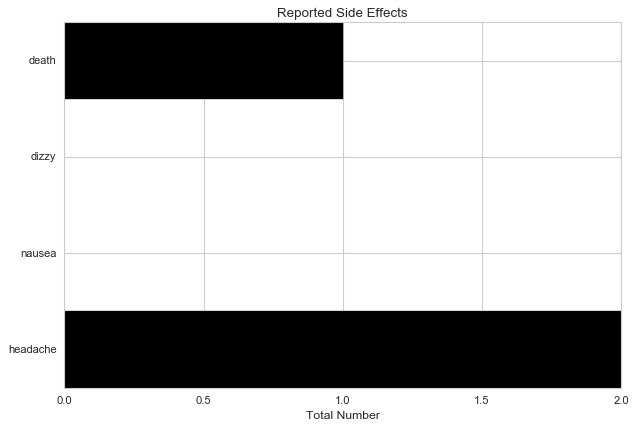

In [60]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)

ax.set_xlabel('Total Number')
ax.set_title('Reported Side Effects')
plt.style.use('seaborn')

In [ ]:
plt.savefig('filename.png')

# Wordcloud

In [151]:
data = pd.read_csv('../raw_data/drugsComTrain_raw.csv')
data.head()

train_data = data.drop(["uniqueID", "condition", "date", "usefulCount"], axis =1)
print(train_data.shape)
train_data.head()

(161297, 3)


,drugName,review,rating
0,Valsartan,"""It has no side effect, I take it in combinati...",9
1,Guanfacine,"""My son is halfway through his fourth week of ...",8
2,Lybrel,"""I used to take another oral contraceptive, wh...",5
3,Ortho Evra,"""This is my first time using any form of birth...",8
4,Buprenorphine / naloxone,"""Suboxone has completely turned my life around...",9


In [152]:
# data cleaning
import string 

def remove_punct(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    text = text.replace('\n', ' ')
    return text

def to_lower(text):
    return text.lower()

def remove_numbers(text):
    text = ''.join(word for word in text if not word.isdigit())
    return text

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text) 
    text = [w for w in word_tokens if not w in stop_words]
    text = ' '.join(text)
    return text

from nltk.stem import WordNetLemmatizer

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word) for word in text]
    text = ''.join(lemmatized)
    return text

In [153]:
train_data["clean_review"] = train_data["review"].apply(remove_punct).apply(to_lower).apply(remove_numbers).apply(remove_stopwords).apply(lemmatize_text)

train_data.head()

,drugName,review,rating,clean_review
0,Valsartan,"""It has no side effect, I take it in combinati...",9,side effect take combination bystolic mg fish oil
1,Guanfacine,"""My son is halfway through his fourth week of ...",8,son halfway fourth week intuniv became concern...
2,Lybrel,"""I used to take another oral contraceptive, wh...",5,used take another oral contraceptive pill cycl...
3,Ortho Evra,"""This is my first time using any form of birth...",8,first time using form birth control im glad we...
4,Buprenorphine / naloxone,"""Suboxone has completely turned my life around...",9,suboxone completely turned life around feel he...


In [156]:
# Start with one review:
text = train_data.clean_review.iloc[2]
text

'used take another oral contraceptive pill cycle happy light periods max days side effects contained hormone gestodene available us switched lybrel ingredients similar pills ended started lybrel immediately first day period instructions said period lasted two weeks taking second pack two weeks third pack things got even worse third period lasted two weeks end third week still daily brown discharge positive side didnt side effects idea period free tempting alas'

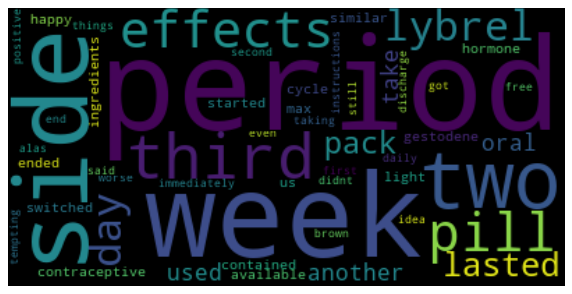

In [157]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [158]:
# Look at all reviews:
whole_text = " ".join(review for review in train_data.clean_review)
print ("There are {} words in the combination of all review.".format(len(whole_text)))

There are 44770217 words in the combination of all review.


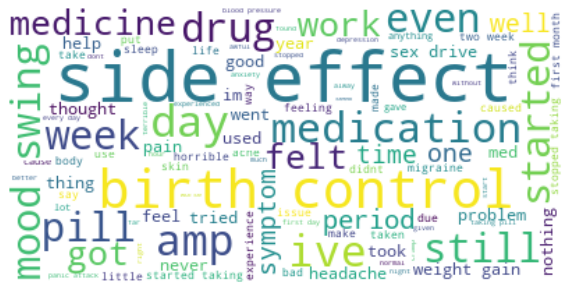

In [163]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=100, background_color="white").generate(whole_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud.png')
plt.show()

In [160]:
# Look at reviews with rating below 5:
train_data = train_data[data.rating < 6]
whole_text = " ".join(review for review in train_data.clean_review)
print ("There are {} words in the combination of all bad reviews.".format(len(whole_text)))

There are 13110124 words in the combination of all bad reviews.


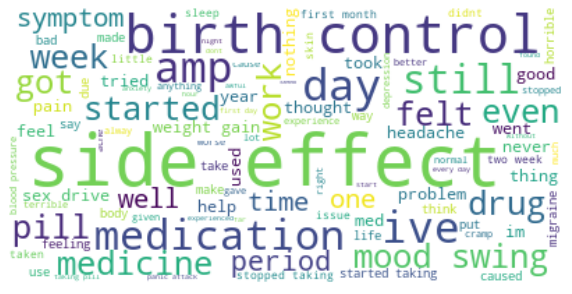

In [161]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=100, background_color="white").generate(whole_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Real data

In [61]:
data = pd.read_csv('../raw_data/data_se_sums.csv')
data.head()

,drugName,insomnia,burning,sweating,burned,nauseous,moody,acne,nightmare,headache,...,itching,dryness,aggressive,itchy,diarrhoea,breathlessness,angry,anxious,peeling,anhedonia
0,Abacavir / dolutegravir / lamivudine,1,0,0,0,1,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1,Abatacept,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Abilify,6,1,3,0,3,0,0,1,2,...,0,0,1,0,0,0,3,5,0,0
3,Abilify Maintena,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Abiraterone,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
singlesample = data.loc[[2]]
singlesample.index[0]

2

In [131]:
def make_dicks(pandas):
    row = {}
    for column in pandas.columns:
        row[f'{column}'] = pandas.loc[pandas.index[0],f'{column}']
    return row

In [137]:
bigdick = make_dicks(singlesample)

In [133]:
zero_se = []
for key, value in bigdick.items():
    if value == 0:
        zero_se.append(key)
for z in zero_se:
    del bigdick[z]

bigdick

{'drugName': 'Abilify',
 'insomnia': 6,
 'burning': 1,
 'sweating': 3,
 'nauseous': 3,
 'nightmare': 1,
 'headache': 2,
 'feeling': 13,
 'hungry': 3,
 'tired': 8,
 'shaking': 1,
 'cold': 4,
 'fatigue': 1,
 'tiredness': 1,
 'pain': 2,
 'heartburn': 1,
 'dizziness': 2,
 'spot': 2,
 'depression': 23,
 'anxiety': 15,
 'nausea': 7,
 'paranoid': 6,
 'aggressive': 1,
 'angry': 3,
 'anxious': 5}

In [135]:
sideEffects = list(bigdick.values())[1:]
sideEffectsFreq = list(bigdick.keys())[1:]

print(sideEffects, sideEffectsFreq)

[6, 1, 3, 3, 1, 2, 13, 3, 8, 1, 4, 1, 1, 2, 1, 2, 2, 23, 15, 7, 6, 1, 3, 5] ['insomnia', 'burning', 'sweating', 'nauseous', 'nightmare', 'headache', 'feeling', 'hungry', 'tired', 'shaking', 'cold', 'fatigue', 'tiredness', 'pain', 'heartburn', 'dizziness', 'spot', 'depression', 'anxiety', 'nausea', 'paranoid', 'aggressive', 'angry', 'anxious']


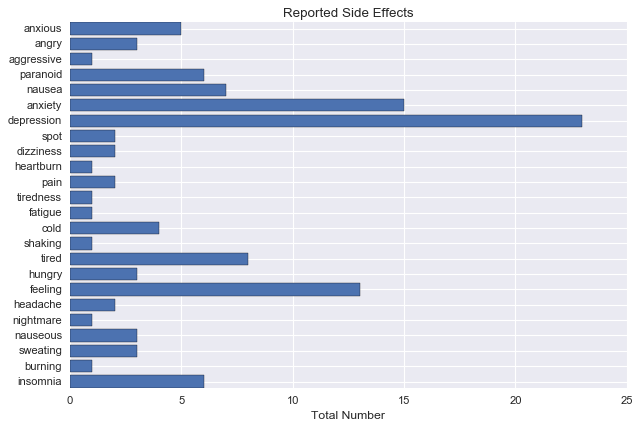

In [136]:
fig, ax = plt.subplots()
ax.barh(sideEffectsFreq, sideEffects)

ax.set_xlabel('Total Number')
ax.set_title('Reported Side Effects')
plt.style.use('seaborn')